Our goal is to estimate expected delivery time and to predict the courier's next movement. 

The first thing we did is figuring out the meaning and connection behind each variables, and thinking about how they would influence the target variable we neeed to predict. We find there are both numeric variables and factor variables exist, so we transform factor variables into numbers.

**Problems we met:

UnicodeDecodeError have trouble read test_dataframe because the table contains chinese. use (encoding = 'gbk') to solve.

the meaning of source type 'ASSIGN'.

we doubted the significance of some variables.

In [ ]:
#Import Python packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#read data
data_train = pd.read_csv("dataframe_train.csv")
data_train

FileNotFoundError: ignored

In [ ]:
data_test = pd.read_csv("dataframe_test.csv")
data_test

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,weather_grade,aoi_id,shop_id,id,source_type,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour
0,10007871,2,2100075893538325690,121.630558,39.140900,20200228,20200228100078712,3,5.535851,11,正常天气,bf49288eb197bc6b44fa0573acf8c74d,34887bf8e1a0de848d271bc6b7059670,509790,ASSIGN,2100075890778834106,121.630558,39.140900,121.629930,39.144603,796.0,412.0,1776.0,13
1,10007871,2,2100075893538325690,121.630558,39.140900,20200228,20200228100078712,3,5.535851,11,正常天气,bf49288eb197bc6b44fa0573acf8c74d,34887bf8e1a0de848d271bc6b7059670,509791,PICKUP,2100075893538325690,121.629930,39.144603,121.629604,39.150661,1048.0,348.0,697.0,13
2,10007871,2,2100075890778834106,121.630558,39.140900,20200228,20200228100078712,3,5.535851,11,正常天气,9291e6fede798be58711cf53419eb285,34887bf8e1a0de848d271bc6b7059670,509792,DELIVERY,2100075893538325690,121.629604,39.150661,121.629930,39.144603,1019.0,171.0,1756.0,13
3,10007871,2,2100075890778834106,121.630558,39.140900,20200228,20200228100078712,3,5.535851,11,正常天气,9291e6fede798be58711cf53419eb285,34887bf8e1a0de848d271bc6b7059670,509793,PICKUP,2100075890778834106,121.629930,39.144603,121.630544,39.152711,1198.0,180.0,676.0,13
4,10007871,2,2100075893235123625,121.630558,39.140900,20200228,20200228100078712,3,5.535851,11,正常天气,4fdb588dc34ac31ce738a32696315b5d,5e65ed920db306852d16f1ec176011ed,509794,DELIVERY,2100075890778834106,121.630544,39.152711,121.631446,39.142762,1275.0,742.0,2336.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25463,125996858,5,2100075920609773016,121.447895,39.210704,20200228,202002281259968585,3,5.681500,11,正常天气,d0674c5fd609d26c9164e98bd4c3dc29,86ba4e4a1dcc00e61b1d82ea394e4533,535067,DELIVERY,2100075919273624887,121.457034,39.217461,121.453294,39.214381,703.0,496.0,3872.0,19
25464,125996858,6,2100075927285073472,121.453580,39.205943,20200228,202002281259968586,3,5.681500,11,正常天气,d61d1ce18b53a55ed8729889ad16426a,cf304117a4b0eb083d47e55111bd4624,535068,ASSIGN,2100075928203953528,121.453580,39.205943,121.450119,39.209546,1297.0,1080.0,2043.0,19
25465,125996858,6,2100075927285073472,121.453580,39.205943,20200228,202002281259968586,3,5.681500,11,正常天气,d61d1ce18b53a55ed8729889ad16426a,cf304117a4b0eb083d47e55111bd4624,535069,PICKUP,2100075927285073472,121.450119,39.209546,121.450644,39.207601,233.0,158.0,1204.0,19
25466,125996858,6,2100075928203953528,121.453580,39.205943,20200228,202002281259968586,3,5.681500,11,正常天气,86e50587e1ba446bc427c687f8593606,2626cd2412b5a56fe7665ee8aeb86f98,535070,DELIVERY,2100075927285073472,121.450644,39.207601,121.452471,39.209303,720.0,291.0,2948.0,19


In [ ]:
#transform action_type, weather_grade and source_type into numbers
for i in range(509604):
    if  data_train['weather_grade'][i] == '正常天气':
        data_train['weather_grade'][i] = 1
    elif data_train['weather_grade'][i] == '轻微恶劣天气':
        data_train['weather_grade'][i] = 2
    elif data_train['weather_grade'][i] == '恶劣天气':
        data_train['weather_grade'][i] = 3
    else:
        data_train['weather_grade'][i] = 4

    if data_train['action_type'][i] == 'PICKUP':
        data_train['action_type'][i] = 0 
    else:
        data_train['action_type'][i] = 1

    if data_train['source_type'][i] == 'PICKUP':
        data_train['source_type'][i] = 0 
    else:
        data_train['source_type'][i] = 1

    if i%10000 == 0:
        print(i)

data_train

"for i in range(509604):\n    if  data_train['weather_grade'][i] == '正常天气':\n        data_train['weather_grade'][i] = 1\n    elif data_train['weather_grade'][i] == '轻微恶劣天气':\n        data_train['weather_grade'][i] = 2\n    elif data_train['weather_grade'][i] == '恶劣天气':\n        data_train['weather_grade'][i] = 3\n    else:\n        data_train['weather_grade'][i] = 4\n\n    if data_train['action_type'][i] == 'PICKUP':\n        data_train['action_type'][i] = 0 \n    else:\n        data_train['action_type'][i] = 1\n\n    if data_train['source_type'][i] == 'PICKUP':\n        data_train['source_type'][i] = 0 \n    else:\n        data_train['source_type'][i] = 1\n\n    if i%10000 == 0:\n        print(i)\n\ndata_train"

In [ ]:
#transform action_type, weather_grade and source_type into numbers
'''for i in range(25468):
    if  data_test['weather_grade'][i] == '正常天气':
        data_test['weather_grade'][i] = 1
    elif data_test['weather_grade'][i] == '轻微恶劣天气':
        data_test['weather_grade'][i] = 2
    elif data_test['weather_grade'][i] == '恶劣天气':
        data_test['weather_grade'][i] = 3
    else:
        data_test['weather_grade'][i] = 4

    if data_test['source_type'][i] == 'PICKUP':
        data_test['source_type'][i] = 0 
    else:
        data_test['source_type'][i] = 1

    if i%10000 == 0:
        print(i)

data_test'''

"for i in range(25468):\n    if  data_test['weather_grade'][i] == '正常天气':\n        data_test['weather_grade'][i] = 1\n    elif data_test['weather_grade'][i] == '轻微恶劣天气':\n        data_test['weather_grade'][i] = 2\n    elif data_test['weather_grade'][i] == '恶劣天气':\n        data_test['weather_grade'][i] = 3\n    else:\n        data_test['weather_grade'][i] = 4\n\n    if data_test['source_type'][i] == 'PICKUP':\n        data_test['source_type'][i] = 0 \n    else:\n        data_test['source_type'][i] = 1\n\n    if i%10000 == 0:\n        print(i)\n\ndata_test"

In [ ]:
data_train = pd.read_csv('data_train.csv')
data_test = pd.read_csv('data_test.csv')

Among regression methods, we use linear regression and PCA to select columes. As for classification method, we tried logestic regression, KNN and CART to analyze the data. Moreover, we also tried other method like XGBoost and Random Forest to make predictions.



**Regression**

**linear Regression**

The first method we tried was linear regression, the simplest method. Since a courier can have many orders at the same time, it means that there are several possibilities for the courier to choose, each has a different task and location. The connections between variables and target variavle are comlicated and unconspicuous. 

To intergrate the useful information 解释各个or列举变量的作用，本来打算直接舍弃。。。，但觉得然后我们就觉得有用，无法割舍就都放进去了，但结果不是很理想

In [ ]:
#linear regression baseline
data_train['predict_time'] = 0
data_train = data_train.reset_index()

#use distance/time to predict baseline predict time
for i in range(509604):
  data_train['predict_time'][i] = data_train['grid_distance'][i] / data_train['speed'][i]

y_predict = data_train['predict_time']
y_actual = data_train['expected_use_time']

mae_test_baseline = np.sum(np.absolute(y_predict-y_actual))/len(y_actual)
mae_test_baseline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


265.6089434148869

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#split 
x = data_train[['speed', 'max_load', 'source_type', 'grid_distance', 'hour', 'source_lat']]
y = data_train[['expected_use_time']]
X_train, X_validate, y_train, y_validate = train_test_split(x,y, test_size = 0.25)

In [ ]:
#split test data
x_test = data_test[['speed', 'max_load', 'source_type', 'grid_distance', 'hour', 'source_lat']]

However, by feeding everything to the linear regression model and letting it return a prediction, the outcome was not satisfying.

Using the MAE function, we got a loss of 259 for expected time and almost no accuracy for the action type prediction.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X_standardized = scaler.transform(x)
for i in range(15):
  from sklearn import datasets, linear_model
  lasso = linear_model.Lasso(alpha=i)
  lasso.fit(X_standardized,y)
  print(i)
  print(lasso.coef_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34982279484.21115, tolerance: 8362098.174090022
  positive)


0
[-19.3668555   -6.11081758 117.71407501 117.67821116   3.59195377
  -2.75995597]
1
[-18.41693498  -5.16357963 116.66454625 116.6845346    2.62327338
  -1.93946777]
2
[-17.46700229  -4.21633333 115.61501845 115.69085872   1.65459199
  -1.1189812 ]
3
[-16.51706961  -3.26908703 114.56549066 114.69718285   0.68591059
  -0.29849463]
4
[-15.52861724  -2.27900105 113.51479351 113.68585008   0.
  -0.        ]
5
[-14.51751238  -1.27333392 112.46144377 112.64601465   0.
  -0.        ]
6
[-13.50640753  -0.26766679 111.40809403 111.60617923   0.
  -0.        ]
7
[-12.50683835  -0.         110.35437318 110.55911      0.
  -0.        ]
8
[-11.51145328  -0.         109.3005177  109.50941711   0.
  -0.        ]
9
[-10.51606822  -0.         108.24666222 108.45972423   0.
  -0.        ]
10
[ -9.52068315  -0.         107.19280673 107.41003135   0.
  -0.        ]
11
[ -8.52529809  -0.         106.13895124 106.36033847   0.
  -0.        ]
12
[ -7.52991302  -0.         105.08509576 105.31064559   0.
  -0.

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_validate_array = np.array(X_validate)
y_validate_array = np.array(y_validate)
model = lm.fit(X_train_array, y_train_array)
y_pred1 = model.predict(X_validate_array)

mae_test1 = np.sum(np.absolute(y_pred1-y_validate))/len(y_validate)
print(mae_test1)

expected_use_time    248.722984
dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X_array = np.array(x)
y_array = np.array(y)
model = lm.fit(X_array, y_array)
y_pred = model.predict(np.array(x_test))

In [ ]:
sample = pd.read_csv('regression_sample.csv')
sample = pd.read_csv('regression_sample.csv')
sample['y_pred'] = y_pred
sample.to_csv('lasso_lm.csv')

We find the outcome unsatisfying, we guess the features might contains dependent variables and there might have some unnecessary variables that is affecting the outcome. Then we tried to use PCA to select the significant features.

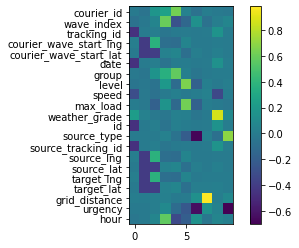

In [ ]:
#PCA to select columes
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pca_scaled = make_pipeline(StandardScaler(),PCA(n_components = 10))
X_pca = pca_scaled.fit_transform(X_train)
components = pca_scaled.named_steps['pca'].components_
a,b = plt.subplots()

plt.imshow(components.T)
plt.yticks(range(len(X_train.columns)),X_train.columns)
plt.colorbar()

In [ ]:
#linear Regression
col_sig = data_train[['source_type','speed','max_load','weather_grade','grid_distance','urgency','expected_use_time','hour']]

reg = smf.ols('expected_use_time ~ source_type + weather_grade + grid_distance + urgency',data=col_sig).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      expected_use_time   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                 2.460e+04
Date:                Tue, 11 Aug 2020   Prob (F-statistic):               0.00
Time:                        08:53:57   Log-Likelihood:            -3.7378e+06
No. Observations:              509604   AIC:                         7.476e+06
Df Residuals:                  509599   BIC:                         7.476e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       190.9698      1.185    161.165

In [ ]:
reg.rsquared

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model1 = lm.fit(X_train[['source_type','speed','max_load','weather_grade','grid_distance','urgency']], y_train)
y_pred1 = lm.predict(X_validate[['source_type','speed','max_load','weather_grade','grid_distance','urgency']])
mae_test1 = np.sum(np.absolute(y_pred1-y_validate))/len(y_validate)
print(mae_test1)

print(model1.score(X_validate[['source_type','speed','max_load','weather_grade','grid_distance','urgency']],y_validate))

**Ridge**

In [ ]:
from sklearn import datasets, linear_model
ridge_reg = linear_model.Ridge()
ridge_reg.fit(X_train,y_train)
y_pred = ridge_reg.predict(X_validate)
mae = np.sum(np.absolute(y_pred-y_validate))/len(y_pred)
print(mae)

expected_use_time    247.929344
dtype: float64


In [ ]:
ridge_reg = linear_model.Ridge()
ridge_reg.fit(x,y)
y_test_pred = ridge_reg.predict(x_test)

In [ ]:
sample = pd.read_csv('regression_sample.csv')
sample

,order,y_pred
0,0,843.1449
1,1,1015.1318
2,2,843.1449
3,3,1045.0840
4,4,988.3464
...,...,...
25463,25463,1468.9363
25464,25464,961.2105
25465,25465,1020.9698
25466,25466,861.9515


In [ ]:
sample['y_pred'] = y_test_pred
sample.to_csv('ridge_[red2.csv')

**XGBoost**

In [ ]:
import xgboost as xgb
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)
xg_reg.fit(np.array(X_train[['weather_grade','source_type', 'grid_distance', 'urgency']]),y_train_array)

preds = xg_reg.predict(np.array(X_validate[['weather_grade','source_type', 'grid_distance', 'urgency']]))
mae = mean_absolute_error(y_validate, preds)
print(mae)

438.8782057453327


In [ ]:
y_test_pred_2 = xg_reg.predict(np.array(x_test[['source_type','speed','max_load','weather_grade','grid_distance','urgency']]))

In [ ]:
sample = pd.read_csv('regression_sample.csv')
sample['y_pred'] = y_test_pred
sample

In [ ]:
sample.to_csv('XGBoost_predict2.csv')

**Classification**

**Logestic Regression**

**Baseline**

In [ ]:
#split the table for classification
from sklearn.model_selection import train_test_split
x = data_train[['courier_id', 'wave_index', 'tracking_id',
       'courier_wave_start_lng', 'courier_wave_start_lat',
       'date', 'group', 'level', 'speed', 'max_load', 'weather_grade',
       'id', 'source_type', 'source_tracking_id',
       'source_lng', 'source_lat', 'target_lng', 'target_lat', 'grid_distance', 
       'urgency', 'hour']]
y = data_train[['action_type']]
X_train, X_validate, y_train, y_validate = train_test_split(x,y, test_size = 0.25)

In [ ]:
#baseline: predict opposite action from source action type(if Assign, predict Pickup[0])
X_validate['y_pred'] = 0
X_validate = X_validate.reset_index()

for i in range(127401):
    X_validate['y_pred'][i] = 1 - X_validate['source_type'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
CM_baseline = confusion_matrix(y_validate.astype('int'), X_validate['y_pred'])
print(CM_baseline)

print(accuracy_score(y_validate.astype('int'), X_validate['y_pred']))

[[37952 25689]
 [25652 38108]]
0.5970125823188202


In [ ]:
#logestic Regression
from sklearn import datasets, linear_model
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(X_train[['weather_grade','source_type', 'grid_distance', 'urgency']],y_train.astype('int'))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_curve, auc
#x_validate1 = x_validate1.drop(columns = ['index','y_pred'])
y1r_pred = logistic_model.predict(X_validate[['weather_grade','source_type', 'grid_distance', 'urgency']])
y1r_pred_prob = logistic_model.predict_proba(X_validate[['weather_grade','source_type', 'grid_distance', 'urgency']])
y1r_pred_prob[0,0]  
y1r_pred_prob

array([[0.56031225, 0.43968775],
       [0.24852241, 0.75147759],
       [0.41663322, 0.58336678],
       ...,
       [0.66403611, 0.33596389],
       [0.51284627, 0.48715373],
       [0.48173814, 0.51826186]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_action = confusion_matrix(y_validate.astype('int'), y1r_pred.astype('int'))
confusion_matrix_action

array([[48619, 15022],
       [23705, 40055]])

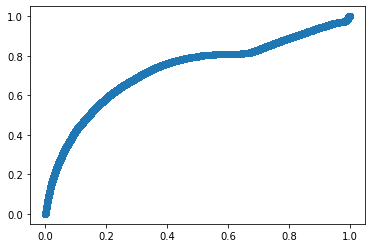

In [ ]:
fpr,tpr,thresholds = roc_curve(y_validate.astype('int'),y1r_pred_prob[:,1]) 
plt.plot(fpr, tpr, marker = 'o')

In [ ]:
auc(fpr,tpr)

0.7277787105059225

**KNN**

In [ ]:
#KNN
#选出X和y的列
X_train_sig = X_train[['weather_grade','source_type', 'grid_distance', 'urgency']]
y_train_sig = y_train[['action_type']]
X_validate_sig = X_validate[['weather_grade','source_type', 'grid_distance', 'urgency']]
y_validate_sig = y_validate[['action_type']]

#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_sig)
X_standardized_train = scaler.transform(X_train_sig)
scaler.fit(X_validate_sig)
X_standardized_validate = scaler.transform(X_validate_sig)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(8, 20):
  knn = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  knn.fit(X_standardized_train,y_train_sig.astype('int'))
  OA_knn=knn.score(X_standardized_validate,y_validate_sig.astype('int'))
  print(i)
  print(OA_knn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


8
0.685889435718715


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


9
0.6879302360264048


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


10
0.6883148483920848


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


11
0.690237910220485


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


12
0.6907324118335021


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


13
0.6921531228169323


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


14
0.6914388427092409


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


15
0.6938721046145635


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


16
0.6932755629861618


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


17
0.694586384722255


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


18
0.6939192000062794


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


19
0.6954419510050942


**CART**

In [ ]:
X_train_sig = X_train[['courier_id', 'wave_index', 'tracking_id',
       'courier_wave_start_lng', 'courier_wave_start_lat',
       'date', 'group', 'level', 'speed', 'max_load', 'weather_grade',
       'id', 'source_type', 'source_tracking_id',
       'source_lng', 'source_lat', 'target_lng', 'target_lat', 'grid_distance', 
       'urgency', 'hour']]
#X_train_sig = X_train[['weather_grade','source_type', 'grid_distance', 'urgency']]
y_train_sig = y_train[['action_type']]
X_validate_sig = X_validate[['courier_id', 'wave_index', 'tracking_id',
       'courier_wave_start_lng', 'courier_wave_start_lat',
       'date', 'group', 'level', 'speed', 'max_load', 'weather_grade',
       'id', 'source_type', 'source_tracking_id',
       'source_lng', 'source_lat', 'target_lng', 'target_lat', 'grid_distance', 
       'urgency', 'hour']]
#X_validate_sig = X_validate[['weather_grade','source_type', 'grid_distance', 'urgency']]
y_validate_sig = y_validate[['action_type']]

In [ ]:
for i in range(5, 16):
  from sklearn.tree import DecisionTreeClassifier
  tree1 = DecisionTreeClassifier(max_depth=i)
  tree1.fit(X_train_sig, y_train_sig.astype('int'))
  y_predict = tree1.predict(X_validate_sig)

  print(i)
  CM_tree1 = confusion_matrix(y_validate_sig.astype('int'), y_predict)
  print(CM_tree1)

  #overall accuracy
  print(accuracy_score(y_validate_sig.astype('int'), y_predict))

5
[[44950 18691]
 [15307 48453]]
0.7331418120736886
6
[[46457 17184]
 [16558 47202]]
0.7351512154535679
7
[[47078 16563]
 [16894 46866]]
0.7373882465600741
8
[[46973 16668]
 [16872 46888]]
0.7367367603080038
9
[[46963 16678]
 [16522 47238]]
0.739405499171906
10
[[47328 16313]
 [16618 47142]]
0.7415169425671698
11
[[46755 16886]
 [15871 47889]]
0.7428827089269315
12
[[47366 16275]
 [16413 47347]]
0.7434243059316646
13
[[47767 15874]
 [16589 47171]]
0.7451903831210116
14
[[47436 16205]
 [16111 47649]]
0.7463442202180517
15
[[48053 15588]
 [16786 46974]]
0.7458889647647977


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=i)
tree1.fit(X_train_sig, y_train_sig.astype('int'))
y_predict = tree1.predict(X_validate_sig)

In [ ]:
#max_depth可以改
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=14)
tree1.fit(X_train_sig, y_train_sig.astype('int'))
y_predict = tree1.predict(X_validate_sig)
y_predict

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
#confusion matrix
CM_tree1 = confusion_matrix(y_validate_sig.astype('int'), y_predict)
print(CM_tree1)

#overall accuracy
print(accuracy_score(y_validate_sig.astype('int'), y_predict))

[[47338 16303]
 [16626 47134]]
0.7415326410310751


In [ ]:
sample = pd.read_csv('classification_sample.csv')
sample

,order,y_pred
0,0,0
1,1,1
2,2,0
3,3,1
4,4,1
...,...,...
25463,25463,1
25464,25464,0
25465,25465,0
25466,25466,1


In [ ]:
y_test_predict = tree1.predict(x_test[['courier_id','wave_index','max_load','weather_grade','source_type','grid_distance','urgency']])
sample['y_pred'] = y_test_predict

In [ ]:
sample.to_csv('CART_pred1.csv')

In [ ]:
OA_vec = []
for mp in range(25):
  tree_action = DecisionTreeClassifier(max_depth=mp+1)
  tree_action.fit(X_train_sig, y_train_sig.astype('int'))
  y_predict = tree_action.predict(X_validate_sig)
  print("\n",'Length',mp+1,'OA',accuracy_score(y_validate_sig.astype('int'), y_predict))
  OA_vec.append(accuracy_score(y_validate_sig.astype('int'), y_predict))
  CM_tree = confusion_matrix(y_validate_sig.astype('int'), y_predict)
  print(CM_tree)


 Length 1 OA 0.6578284314879789
[[35150 28491]
 [15102 48658]]

 Length 2 OA 0.7012582318820103
[[57106  6535]
 [31525 32235]]

 Length 3 OA 0.7111718118382117
[[45435 18206]
 [18591 45169]]

 Length 4 OA 0.7317917441778322
[[46296 17345]
 [16825 46935]]

 Length 5 OA 0.7331418120736886
[[44950 18691]
 [15307 48453]]

 Length 6 OA 0.7351512154535679
[[46457 17184]
 [16558 47202]]

 Length 7 OA 0.7373803973281214
[[47078 16563]
 [16895 46865]]

 Length 8 OA 0.7367917049316725
[[46977 16664]
 [16869 46891]]

 Length 9 OA 0.7393662530121428
[[46963 16678]
 [16527 47233]]

 Length 10 OA 0.7414698471754538
[[47325 16316]
 [16621 47139]]

 Length 11 OA 0.7428984073908368
[[46748 16893]
 [15862 47898]]

 Length 12 OA 0.7433850597719013
[[47353 16288]
 [16405 47355]]

 Length 13 OA 0.7450726446417218
[[47766 15875]
 [16603 47157]]

 Length 14 OA 0.7463363709860991
[[47457 16184]
 [16133 47627]]

 Length 15 OA 0.7458811155328451
[[48064 15577]
 [16798 46962]]

 Length 16 OA 0.7463206725221937


**random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf_tree = RandomForestClassifier(max_depth = 29, n_estimators = 50)
rf_tree.fit(X_train_sig, y_train_sig.astype('int'))
y_predict = rf_tree.predict(X_validate_sig)
CM_RF = confusion_matrix(y_validate_sig, y_predict)
print(accuracy_score(y_validate_sig.astype('int'), y_predict))
print(CM_RF)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.984937323882858
[[62755  1036]
 [  883 62727]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
for i in range(26, 30):
  rf_tree = RandomForestClassifier(max_depth = i, n_estimators = 50)
  rf_tree.fit(X_train_sig, y_train_sig.astype('int'))
  y_predict = rf_tree.predict(X_validate_sig)

  print(i)
  print(accuracy_score(y_validate_sig.astype('int'), y_predict))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


26
0.9563661195751996


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


27
0.9712090171976672


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


28
0.9783753659704398


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


29
0.9846312038367045


In [ ]:
X_train = data_train[['courier_id', 'wave_index', 'tracking_id',
       'courier_wave_start_lng', 'courier_wave_start_lat',
       'date', 'group', 'level', 'speed', 'max_load', 'weather_grade',
       'id', 'source_type', 'source_tracking_id',
       'source_lng', 'source_lat', 'target_lng', 'target_lat', 'grid_distance', 
       'urgency', 'hour']]
y_train = data_train[['action_type']]

X_test = data_test[['courier_id', 'wave_index', 'tracking_id',
       'courier_wave_start_lng', 'courier_wave_start_lat',
       'date', 'group', 'level', 'speed', 'max_load', 'weather_grade',
       'id', 'source_type', 'source_tracking_id',
       'source_lng', 'source_lat', 'target_lng', 'target_lat', 'grid_distance', 
       'urgency', 'hour']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_tree = RandomForestClassifier(max_depth = 29, n_estimators = 50)
rf_tree.fit(X_train, y_train.astype('int'))
y_predict = rf_tree.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
RF_prediction = pd.read_csv('classification_sample.csv')

In [ ]:
RF_prediction['y_pred'] = y_predict
RF_prediction.to_csv('RF_prediction9.csv')

In [ ]:
for j in range (10):
    val_score = []
    test_score = []
    #X_train_validate, X_test, y_train_validate, y_test = train_test_split(x,y, test_size = 0.999)
    X_train, X_validate, y_train, y_validate = train_test_split(x, y, test_size = 0.25)
    print(j)
    for i in range(3,10):
        tree_D2Hawkeye = DecisionTreeClassifier(max_depth = i)
        tree_D2Hawkeye.fit(X_train, y_train)
        print(i)
        val_score.append(tree_D2Hawkeye.score(X_validate, y_validate))
    
    #max_val_score.append(np.max(val_score))
    print('Valid score')
    print(np.max(val_score))
 

0
3
4
5
6
7
8
9
Valid score
0.7386048775127354
1
3
4
5
6
7
8
9
Valid score
0.7375844773588904
2
3
4
5
6
7
8
9
Valid score
0.7376001758227957
3
3
4
5
6
7
8
9
Valid score
0.7386755206003093
4
3
4
5
6
7
8
9
Valid score
0.7398058100014914
5
3
4
5
6
7
8
9
Valid score
0.7390051883423207
6
3
4
5
6
7
8
9
Valid score
0.7400334377281182
7
3
4
5
6
7
8
9
Valid score
0.7388089575435044
8
3
4
5
6
7
8
9
Valid score
0.7396174284346276
9
3
4
5
6
7
8
9
Valid score
0.7385185359612562
